In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(readxl))
suppressMessages(library(data.table))
suppressMessages(library(glue))

In [2]:
suppressMessages(library(cowplot))
theme_set(theme_cowplot(font_size = 14))

In [5]:
getwd()

[1] "/project2/yangili1/cdai/SpliFi/analysis"

In [4]:
setwd("~/cdai/SpliFi/analysis")

In [6]:
sample_file = '../code/resources/moreira/moreira-sample-info.xlsx'

In [11]:
species = readxl::excel_sheets(sample_file)
names(species) = species

In [12]:
sample_info = map(species, ~read_excel(sample_file, .x))

In [13]:
sample_info = map(sample_info, as.data.table)

In [14]:
sample_info[['hs']][
  !str_detect(`developmental stage`, "conception")
][, .N, by = .(`organism part`, `developmental stage`)][order(`organism part`, `developmental stage`)]

organism part,developmental stage,N
<chr>,<chr>,<int>
forebrain,adolescent,4
forebrain,elderly,2
forebrain,infant,2
forebrain,middle adult,2
forebrain,neonate,3
forebrain,school age child,2
forebrain,toddler,3
forebrain,young adult,5
heart,adolescent,1


In [15]:
options(repr.plot.width=10, repr.plot.height=5)

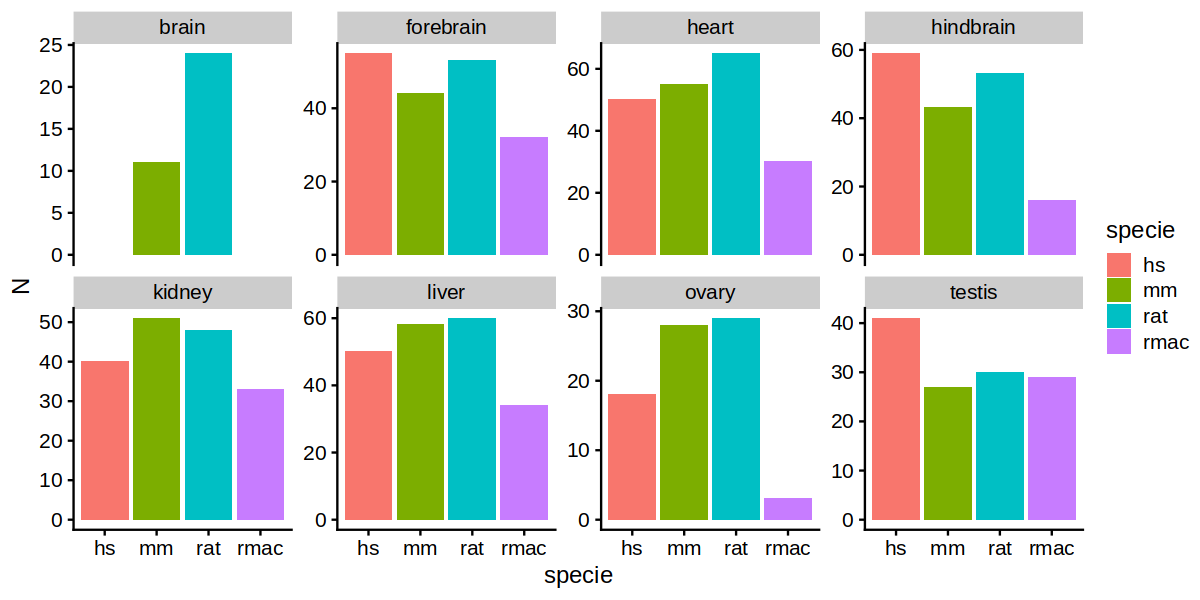

In [16]:
imap_dfr(sample_info, ~.x[, 
.(specie = .y, .N), by = .(`organism part`)]) %>% 
ggplot() + geom_col(aes(x = `specie`, y = N, fill = `specie`)) +
	facet_wrap(~`organism part`, scales = 'free_y', nrow = 2)

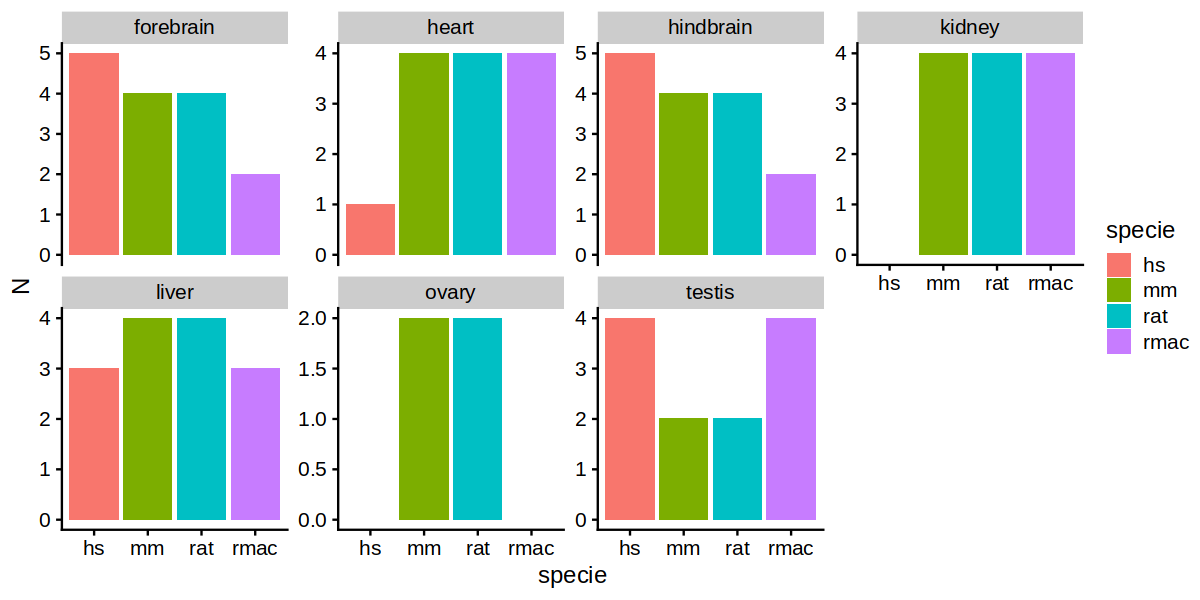

In [17]:
imap_dfr(sample_info, ~.x[`developmental stage2` %in% c("young adult", "3 years postnatal", "postnatal day 42", "postnatal day 28"), 
.(specie = .y, .N), by = .(`organism part`)]) %>% 
ggplot() + geom_col(aes(x = `specie`, y = N, fill = `specie`)) +
	facet_wrap(~`organism part`, scales = 'free_y', nrow = 2)

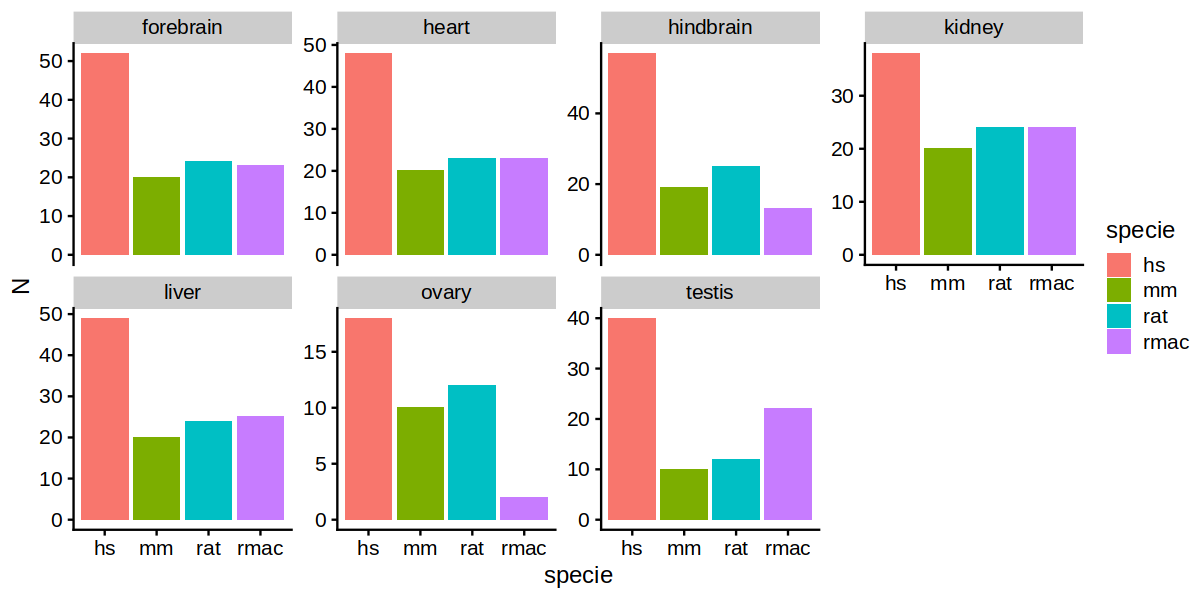

In [18]:
imap_dfr(sample_info, ~.x[
	(str_detect(`developmental stage2`, "post") | `developmental stage2` %in% c("neonate", "adolescent", "school age child", "middle adult", "young adult", "infant", "elderly", "todler")), 
.(specie = .y, .N), by = .(`organism part`)]) %>% 
ggplot() + geom_col(aes(x = `specie`, y = N, fill = `specie`)) +
	facet_wrap(~`organism part`, scales = 'free_y', nrow = 2)

## Select *Brain*

In [227]:
brain_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [228]:
# human samples
brain_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "rain")][str_detect(`developmental stage2`, "adult|adolescent")][order(age)][1:10]
brain_samples[['hs']]

Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5570sTS.Human.Brain.13ypb.Male,Homo sapiens,normal,adolescent,not available,13,male,forebrain,adolescent,forebrain,5570sTS.Human.Brain.13ypb.Male
5515sTS.Human.Brain.14ypb.Male,Homo sapiens,normal,adolescent,not available,14,male,forebrain,adolescent,forebrain,5515sTS.Human.Brain.14ypb.Male
5532sTS.Human.Brain.16ypb.Male,Homo sapiens,normal,adolescent,not available,16,male,forebrain,adolescent,forebrain,5532sTS.Human.Brain.16ypb.Male
5553sTS.Human.Brain.17ypb.Male,Homo sapiens,normal,adolescent,not available,17,male,forebrain,adolescent,forebrain,5553sTS.Human.Brain.17ypb.Male
6048sTS.Human.Brain.28ypb.Male,Homo sapiens,normal,young adult,not available,28,male,forebrain,young adult,forebrain,6048sTS.Human.Brain.28ypb.Male
5531sTS.Human.Brain.29ypb.Male,Homo sapiens,normal,young adult,not available,29,male,forebrain,young adult,forebrain,5531sTS.Human.Brain.29ypb.Male
5908sTS.Human.Brain.29ypb.Male,Homo sapiens,normal,young adult,not available,29,male,forebrain,young adult,forebrain,5908sTS.Human.Brain.29ypb.Male
5533sTS.Human.Brain.39ypb.Male,Homo sapiens,normal,young adult,not available,39,male,forebrain,young adult,forebrain,5533sTS.Human.Brain.39ypb.Male
5574sTS.Human.Brain.39ypb.Male,Homo sapiens,normal,young adult,not available,39,male,forebrain,young adult,forebrain,5574sTS.Human.Brain.39ypb.Male


In [229]:
# mm
brain_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "rain") & str_detect(`developmental stage`, 'postnatal')][age > 10][1:10][order(age)]
brain_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1876sTS.Mouse.Brain.2wpb.Male,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,14,male,forebrain,postnatal day 14,1876sTS.Mouse.Brain.2wpb.Male
1880sTS.Mouse.Brain.2wpb.Male,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,14,male,forebrain,postnatal day 14,1880sTS.Mouse.Brain.2wpb.Male
1884sTS.Mouse.Brain.2wpb.Female,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,14,female,forebrain,postnatal day 14,1884sTS.Mouse.Brain.2wpb.Female
1888sTS.Mouse.Brain.2wpb.Female,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,14,female,forebrain,postnatal day 14,1888sTS.Mouse.Brain.2wpb.Female
1892sTS.Mouse.Brain.4wpb.Male,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,28,male,forebrain,postnatal day 28,1892sTS.Mouse.Brain.4wpb.Male
1896sTS.Mouse.Brain.4wpb.Male,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,28,male,forebrain,postnatal day 28,1896sTS.Mouse.Brain.4wpb.Male
1936sTS.Mouse.Brain.4wpb.Female,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,28,female,forebrain,postnatal day 28,1936sTS.Mouse.Brain.4wpb.Female
1940sTS.Mouse.Brain.4wpb.Female,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,28,female,forebrain,postnatal day 28,1940sTS.Mouse.Brain.4wpb.Female
1944sTS.Mouse.Brain.9wpb.Male,Mus musculus,CD-1,wild type genotype,forebrain,postnatal,63,male,forebrain,postnatal day 63,1944sTS.Mouse.Brain.9wpb.Male


In [230]:
## rat
brain_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "rain") & str_detect(`developmental stage`, 'postnatal')][age > 10][1:10][order(age)]
brain_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2336sTS.Rat.Brain.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,forebrain,postnatal day 14,forebrain,2336sTS.Rat.Brain.2wpb.Female
2339sTS.Rat.Brain.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,forebrain,postnatal day 14,forebrain,2339sTS.Rat.Brain.2wpb.Female
2342sTS.Rat.Brain.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,forebrain,postnatal day 14,forebrain,2342sTS.Rat.Brain.2wpb.Male
2345sTS.Rat.Brain.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,forebrain,postnatal day 14,forebrain,2345sTS.Rat.Brain.2wpb.Male
1875sTS.Rat.Brain.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,forebrain,postnatal day 42,forebrain,1875sTS.Rat.Brain.6wpb.Male
1971sTS.Rat.Brain.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,forebrain,postnatal day 42,forebrain,1971sTS.Rat.Brain.6wpb.Male
1975sTS.Rat.Brain.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,forebrain,postnatal day 42,forebrain,1975sTS.Rat.Brain.6wpb.Female
2348sTS.Rat.Brain.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,forebrain,postnatal day 112,forebrain,2348sTS.Rat.Brain.16wpb.Female
2352sTS.Rat.Brain.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,forebrain,postnatal day 112,forebrain,2352sTS.Rat.Brain.16wpb.Female


In [231]:
## macaque
brain_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "rain") & str_detect(`Source Name`, 'ypb')][! age %in% c('1')][order(`Source Name`)][1:10]
brain_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5413sTS.Macaque.Brain.21ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,forebrain,male,20 to 26 years postnatal,forebrain,5413sTS.Macaque.Brain.21ypb.Male
5461sTS.Macaque.Brain.22ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,forebrain,male,20 to 26 years postnatal,forebrain,5461sTS.Macaque.Brain.22ypb.Male
5501sTS.Macaque.Brain.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,forebrain,male,9 years postnatal,forebrain,5501sTS.Macaque.Brain.9ypb.Male
5988sTS.Macaque.Brain.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,forebrain,male,9 years postnatal,forebrain,5988sTS.Macaque.Brain.9ypb.Male
6076sTS.Macaque.Brain.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,forebrain,male,3 years postnatal,forebrain,6076sTS.Macaque.Brain.3ypb.Male
6084sTS.Macaque.Brain.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,forebrain,male,3 years postnatal,forebrain,6084sTS.Macaque.Brain.3ypb.Male
6088sTS.Macaque.Brain.8ypb.Female,Macaca mulatta,wild type genotype,postnatal,8,forebrain,female,8 years postnatal,forebrain,6088sTS.Macaque.Brain.8ypb.Female
6093sTS.Macaque.Brain.9ypb.Female,Macaca mulatta,wild type genotype,postnatal,9,forebrain,female,9 years postnatal,forebrain,6093sTS.Macaque.Brain.9ypb.Female
6109sTS.Macaque.Brain.2ypb.Male,Macaca mulatta,wild type genotype,postnatal,2,forebrain,male,2 years postnatal,forebrain,6109sTS.Macaque.Brain.2ypb.Male


## Select Heart

In [146]:
heart_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [147]:
#human
heart_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "eart") & str_detect(`developmental stage2`, "adult|adole|child|todler|infant|neon|eld")][order(age)][1:10]
heart_samples[['hs']]

Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5843sTS.Human.Heart.0dpb.Female,Homo sapiens,normal,neonate,not available,0,female,heart,neonate,heart,5843sTS.Human.Heart.0dpb.Female
5828sTS.Human.Heart.6mpb.Female,Homo sapiens,normal,infant,not available,6,female,heart,infant,heart,5828sTS.Human.Heart.6mpb.Female
5850sTS.Human.Heart.6dpb.Male,Homo sapiens,normal,neonate,not available,6,male,heart,neonate,heart,5850sTS.Human.Heart.6dpb.Male
5909sTS.Human.Heart.6mpb.Female,Homo sapiens,normal,infant,not available,6,female,heart,infant,heart,5909sTS.Human.Heart.6mpb.Female
5822sTS.Human.Heart.13ypb.Male,Homo sapiens,normal,adolescent,not available,13,male,heart,adolescent,heart,5822sTS.Human.Heart.13ypb.Male
6042sTS.Human.Heart.25ypb.Male,Homo sapiens,normal,young adult,not available,25,male,heart,young adult,heart,6042sTS.Human.Heart.25ypb.Male
6043sTS.Human.Heart.54ypb.Male,Homo sapiens,normal,middle adult,not available,54,male,heart,middle adult,heart,6043sTS.Human.Heart.54ypb.Male
5905sTS.Human.Heart.94dpb.Male,Homo sapiens,normal,neonate,not available,94,male,heart,neonate,heart,5905sTS.Human.Heart.94dpb.Male
5836sTS.Human.Heart.127dpb.Male,Homo sapiens,normal,infant,not available,127,male,heart,infant,heart,5836sTS.Human.Heart.127dpb.Male


In [148]:
#mm
heart_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "eart") & str_detect(`developmental stage`, 'postnatal')][age > 10][order(age)][1:10]
heart_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
2643sTS.Mouse.Heart.2wpb.Male,Mus musculus,CD-1,wild type genotype,heart,postnatal,14,male,heart,postnatal day 14,2643sTS.Mouse.Heart.2wpb.Male
2645sTS.Mouse.Heart.2wpb.Male,Mus musculus,CD-1,wild type genotype,heart,postnatal,14,male,heart,postnatal day 14,2645sTS.Mouse.Heart.2wpb.Male
2651sTS.Mouse.Heart.2wpb.Female,Mus musculus,CD-1,wild type genotype,heart,postnatal,14,female,heart,postnatal day 14,2651sTS.Mouse.Heart.2wpb.Female
2653sTS.Mouse.Heart.2wpb.Female,Mus musculus,CD-1,wild type genotype,heart,postnatal,14,female,heart,postnatal day 14,2653sTS.Mouse.Heart.2wpb.Female
2655sTS.Mouse.Heart.4wpb.Female,Mus musculus,CD-1,wild type genotype,heart,postnatal,28,female,heart,postnatal day 28,2655sTS.Mouse.Heart.4wpb.Female
2657sTS.Mouse.Heart.4wpb.Female,Mus musculus,CD-1,wild type genotype,heart,postnatal,28,female,heart,postnatal day 28,2657sTS.Mouse.Heart.4wpb.Female
2659sTS.Mouse.Heart.4wpb.Male,Mus musculus,CD-1,wild type genotype,heart,postnatal,28,male,heart,postnatal day 28,2659sTS.Mouse.Heart.4wpb.Male
2661sTS.Mouse.Heart.4wpb.Male,Mus musculus,CD-1,wild type genotype,heart,postnatal,28,male,heart,postnatal day 28,2661sTS.Mouse.Heart.4wpb.Male
1950sTS.Mouse.Heart.9wpb.Female,Mus musculus,CD-1,wild type genotype,heart,postnatal,63,female,heart,postnatal day 63,1950sTS.Mouse.Heart.9wpb.Female


In [149]:
#rat
heart_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "eart") & str_detect(`developmental stage`, 'postnatal')][age > 10][order(age)][1:10]
heart_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2727sTS.Rat.Heart.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,heart,postnatal day 14,heart,2727sTS.Rat.Heart.2wpb.Female
2728sTS.Rat.Heart.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,heart,postnatal day 14,heart,2728sTS.Rat.Heart.2wpb.Female
2731sTS.Rat.Heart.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,heart,postnatal day 14,heart,2731sTS.Rat.Heart.2wpb.Male
2760sTS.Rat.Heart.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,heart,postnatal day 14,heart,2760sTS.Rat.Heart.2wpb.Male
2738sTS.Rat.Heart.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,heart,postnatal day 42,heart,2738sTS.Rat.Heart.6wpb.Female
2740sTS.Rat.Heart.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,heart,postnatal day 42,heart,2740sTS.Rat.Heart.6wpb.Female
2742sTS.Rat.Heart.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,heart,postnatal day 42,heart,2742sTS.Rat.Heart.6wpb.Male
2751sTS.Rat.Heart.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,heart,postnatal day 42,heart,2751sTS.Rat.Heart.6wpb.Male
2746sTS.Rat.Heart.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,heart,postnatal day 112,heart,2746sTS.Rat.Heart.16wpb.Female


In [150]:
#ramac
heart_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "eart") & str_detect(`Source Name`, 'ypb')][!age %in% c('1')][1:10]
heart_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5396sTS.Macaque.Heart.14ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,heart,male,14 to 15 years postnatal,heart,5396sTS.Macaque.Heart.14ypb.Male
5420sTS.Macaque.Heart.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,heart,male,9 years postnatal,heart,5420sTS.Macaque.Heart.9ypb.Male
5422sTS.Macaque.Heart.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,heart,male,3 years postnatal,heart,5422sTS.Macaque.Heart.3ypb.Male
5436sTS.Macaque.Heart.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,heart,male,3 years postnatal,heart,5436sTS.Macaque.Heart.3ypb.Male
5450sTS.Macaque.Heart.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,heart,male,9 years postnatal,heart,5450sTS.Macaque.Heart.9ypb.Male
6078sTS.Macaque.Heart.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,heart,male,3 years postnatal,heart,6078sTS.Macaque.Heart.3ypb.Male
6081sTS.Macaque.Heart.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,heart,male,3 years postnatal,heart,6081sTS.Macaque.Heart.3ypb.Male
6085sTS.Macaque.Heart.8ypb.Female,Macaca mulatta,wild type genotype,postnatal,8,heart,female,8 years postnatal,heart,6085sTS.Macaque.Heart.8ypb.Female
6120sTS.Macaque.Heart.15ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,heart,male,14 to 15 years postnatal,heart,6120sTS.Macaque.Heart.15ypb.Male


## Select kidney

In [151]:
kidney_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [152]:
#human
kidney_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "idney") & ! str_detect(`developmental stage`, 'conception')][1:10]
kidney_samples[['hs']]

Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5819sTS.Human.Kidney.226dpb.Female,Homo sapiens,normal,infant,not available,226,female,kidney,infant,kidney,5819sTS.Human.Kidney.226dpb.Female
5821sTS.Human.Kidney.2ypb.Male,Homo sapiens,normal,toddler,not available,2,male,kidney,toddler,kidney,5821sTS.Human.Kidney.2ypb.Male
5834sTS.Human.Kidney.34dpb.Male,Homo sapiens,normal,neonate,not available,34,male,kidney,neonate,kidney,5834sTS.Human.Kidney.34dpb.Male
5844sTS.Human.Kidney.0dpb.Female,Homo sapiens,normal,neonate,not available,0,female,kidney,neonate,kidney,5844sTS.Human.Kidney.0dpb.Female
6098sTS.Human.Kidney.18dpb.Female,Homo sapiens,normal,neonate,not available,18,female,kidney,neonate,kidney,6098sTS.Human.Kidney.18dpb.Female
6099sTS.Human.Kidney.8ypb.Female,Homo sapiens,normal,school age child,not available,8,female,kidney,school age child,kidney,6099sTS.Human.Kidney.8ypb.Female
6101sTS.Human.Kidney.4ypb.Female,Homo sapiens,normal,toddler,not available,4,female,kidney,toddler,kidney,6101sTS.Human.Kidney.4ypb.Female
6103sTS.Human.Kidney.6mpb.Female,Homo sapiens,normal,infant,not available,6,female,kidney,infant,kidney,6103sTS.Human.Kidney.6mpb.Female
6104sTS.Human.Kidney.6mpb.Male,Homo sapiens,normal,infant,not available,6,male,kidney,infant,kidney,6104sTS.Human.Kidney.6mpb.Male


In [153]:
#mm
kidney_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "idney") & str_detect(`developmental stage`, 'postnatal') & age > 3][1:10]
kidney_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1951sTS.Mouse.Kidney.9wpb.Female,Mus musculus,CD-1,wild type genotype,kidney,postnatal,63,female,kidney,postnatal day 63,1951sTS.Mouse.Kidney.9wpb.Female
2644sTS.Mouse.Kidney.2wpb.Male,Mus musculus,CD-1,wild type genotype,kidney,postnatal,14,male,kidney,postnatal day 14,2644sTS.Mouse.Kidney.2wpb.Male
2646sTS.Mouse.Kidney.2wpb.Male,Mus musculus,CD-1,wild type genotype,kidney,postnatal,14,male,kidney,postnatal day 14,2646sTS.Mouse.Kidney.2wpb.Male
2652sTS.Mouse.Kidney.2wpb.Female,Mus musculus,CD-1,wild type genotype,kidney,postnatal,14,female,kidney,postnatal day 14,2652sTS.Mouse.Kidney.2wpb.Female
2654sTS.Mouse.Kidney.2wpb.Female,Mus musculus,CD-1,wild type genotype,kidney,postnatal,14,female,kidney,postnatal day 14,2654sTS.Mouse.Kidney.2wpb.Female
2656sTS.Mouse.Kidney.4wpb.Female,Mus musculus,CD-1,wild type genotype,kidney,postnatal,28,female,kidney,postnatal day 28,2656sTS.Mouse.Kidney.4wpb.Female
2658sTS.Mouse.Kidney.4wpb.Female,Mus musculus,CD-1,wild type genotype,kidney,postnatal,28,female,kidney,postnatal day 28,2658sTS.Mouse.Kidney.4wpb.Female
2660sTS.Mouse.Kidney.4wpb.Male,Mus musculus,CD-1,wild type genotype,kidney,postnatal,28,male,kidney,postnatal day 28,2660sTS.Mouse.Kidney.4wpb.Male
2662sTS.Mouse.Kidney.4wpb.Male,Mus musculus,CD-1,wild type genotype,kidney,postnatal,28,male,kidney,postnatal day 28,2662sTS.Mouse.Kidney.4wpb.Male


In [154]:
#rat
kidney_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "idney") & str_detect(`developmental stage`, 'postnatal') & age > 3][1:10]
kidney_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2725sTS.Rat.Kidney.1wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,female,kidney,postnatal day 7,kidney,2725sTS.Rat.Kidney.1wpb.Female
2729sTS.Rat.Kidney.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,kidney,postnatal day 14,kidney,2729sTS.Rat.Kidney.2wpb.Female
2730sTS.Rat.Kidney.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,kidney,postnatal day 14,kidney,2730sTS.Rat.Kidney.2wpb.Male
2733sTS.Rat.Kidney.1wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,female,kidney,postnatal day 7,kidney,2733sTS.Rat.Kidney.1wpb.Female
2735sTS.Rat.Kidney.1wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,male,kidney,postnatal day 7,kidney,2735sTS.Rat.Kidney.1wpb.Male
2737sTS.Rat.Kidney.1wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,male,kidney,postnatal day 7,kidney,2737sTS.Rat.Kidney.1wpb.Male
2739sTS.Rat.Kidney.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,kidney,postnatal day 42,kidney,2739sTS.Rat.Kidney.6wpb.Female
2741sTS.Rat.Kidney.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,kidney,postnatal day 42,kidney,2741sTS.Rat.Kidney.6wpb.Female
2743sTS.Rat.Kidney.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,kidney,postnatal day 42,kidney,2743sTS.Rat.Kidney.6wpb.Male


In [155]:
#rmac
kidney_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "idney") & str_detect(`developmental stage`, 'postnatal') & str_detect(`Source Name`, 'ypb')][age != '1'][1:10]
kidney_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5376sTS.Macaque.Kidney.14ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,kidney,male,14 to 15 years postnatal,kidney,5376sTS.Macaque.Kidney.14ypb.Male
5380sTS.Macaque.Kidney.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,kidney,male,3 years postnatal,kidney,5380sTS.Macaque.Kidney.3ypb.Male
5445sTS.Macaque.Kidney.15ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,kidney,male,14 to 15 years postnatal,kidney,5445sTS.Macaque.Kidney.15ypb.Male
5476sTS.Macaque.Kidney.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,kidney,male,9 years postnatal,kidney,5476sTS.Macaque.Kidney.9ypb.Male
5507sTS.Macaque.Kidney.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,kidney,male,3 years postnatal,kidney,5507sTS.Macaque.Kidney.3ypb.Male
6079sTS.Macaque.Kidney.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,kidney,male,3 years postnatal,kidney,6079sTS.Macaque.Kidney.3ypb.Male
6083sTS.Macaque.Kidney.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,kidney,male,3 years postnatal,kidney,6083sTS.Macaque.Kidney.3ypb.Male
6087sTS.Macaque.Kidney.8ypb.Female,Macaca mulatta,wild type genotype,postnatal,8,kidney,female,8 years postnatal,kidney,6087sTS.Macaque.Kidney.8ypb.Female
6091sTS.Macaque.Kidney.9ypb.Female,Macaca mulatta,wild type genotype,postnatal,9,kidney,female,9 years postnatal,kidney,6091sTS.Macaque.Kidney.9ypb.Female


## Select Liver

In [156]:
liver_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [164]:
#human
liver_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "iver") & ! str_detect(`developmental stage`, 'conception')][!age %in% c(58, 55)][1:10]
liver_samples[['hs']]

Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5513sTS.Human.Liver.7ypb.Male,Homo sapiens,normal,school age child,not available,7,male,liver,school age child,liver,5513sTS.Human.Liver.7ypb.Male
5528sTS.Human.Liver.221dpb.Male,Homo sapiens,normal,infant,not available,221,male,liver,infant,liver,5528sTS.Human.Liver.221dpb.Male
5536sTS.Human.Liver.29ypb.Male,Homo sapiens,normal,young adult,not available,29,male,liver,young adult,liver,5536sTS.Human.Liver.29ypb.Male
5544sTS.Human.Liver.15dpb.Female,Homo sapiens,normal,neonate,not available,15,female,liver,neonate,liver,5544sTS.Human.Liver.15dpb.Female
5548sTS.Human.Liver.15dpb.Male,Homo sapiens,normal,neonate,not available,15,male,liver,neonate,liver,5548sTS.Human.Liver.15dpb.Male
5551sTS.Human.Liver.39ypb.Male,Homo sapiens,normal,young adult,not available,39,male,liver,young adult,liver,5551sTS.Human.Liver.39ypb.Male
5552sTS.Human.Liver.271dpb.Male,Homo sapiens,normal,infant,not available,271,male,liver,infant,liver,5552sTS.Human.Liver.271dpb.Male
5556sTS.Human.Liver.2ypb.Female,Homo sapiens,normal,toddler,not available,2,female,liver,toddler,liver,5556sTS.Human.Liver.2ypb.Female
5563sTS.Human.Liver.39ypb.Male,Homo sapiens,normal,young adult,not available,39,male,liver,young adult,liver,5563sTS.Human.Liver.39ypb.Male


In [169]:
#mm
liver_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "iver") & str_detect(`developmental stage`, 'postnatal')][age > 3][1:10]
liver_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1878sTS.Mouse.Liver.2wpb.Male,Mus musculus,CD-1,wild type genotype,liver,postnatal,14,male,liver,postnatal day 14,1878sTS.Mouse.Liver.2wpb.Male
1882sTS.Mouse.Liver.2wpb.Male,Mus musculus,CD-1,wild type genotype,liver,postnatal,14,male,liver,postnatal day 14,1882sTS.Mouse.Liver.2wpb.Male
1886sTS.Mouse.Liver.2wpb.Female,Mus musculus,CD-1,wild type genotype,liver,postnatal,14,female,liver,postnatal day 14,1886sTS.Mouse.Liver.2wpb.Female
1890sTS.Mouse.Liver.2wpb.Female,Mus musculus,CD-1,wild type genotype,liver,postnatal,14,female,liver,postnatal day 14,1890sTS.Mouse.Liver.2wpb.Female
1894sTS.Mouse.Liver.4wpb.Male,Mus musculus,CD-1,wild type genotype,liver,postnatal,28,male,liver,postnatal day 28,1894sTS.Mouse.Liver.4wpb.Male
1898sTS.Mouse.Liver.4wpb.Male,Mus musculus,CD-1,wild type genotype,liver,postnatal,28,male,liver,postnatal day 28,1898sTS.Mouse.Liver.4wpb.Male
1938sTS.Mouse.Liver.4wpb.Female,Mus musculus,CD-1,wild type genotype,liver,postnatal,28,female,liver,postnatal day 28,1938sTS.Mouse.Liver.4wpb.Female
1942sTS.Mouse.Liver.4wpb.Female,Mus musculus,CD-1,wild type genotype,liver,postnatal,28,female,liver,postnatal day 28,1942sTS.Mouse.Liver.4wpb.Female
1946sTS.Mouse.Liver.9wpb.Male,Mus musculus,CD-1,wild type genotype,liver,postnatal,63,male,liver,postnatal day 63,1946sTS.Mouse.Liver.9wpb.Male


In [170]:
#rat
liver_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "iver") & str_detect(`developmental stage`, 'postnatal')][age > 3][1:10]
liver_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1969sTS.Rat.Liver.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,liver,postnatal day 42,liver,1969sTS.Rat.Liver.6wpb.Male
1973sTS.Rat.Liver.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,liver,postnatal day 42,liver,1973sTS.Rat.Liver.6wpb.Male
2287sTS.Rat.Liver.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,liver,postnatal day 42,liver,2287sTS.Rat.Liver.6wpb.Female
2351sTS.Rat.Liver.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,liver,postnatal day 112,liver,2351sTS.Rat.Liver.16wpb.Female
2355sTS.Rat.Liver.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,liver,postnatal day 112,liver,2355sTS.Rat.Liver.16wpb.Female
2359sTS.Rat.Liver.16wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,male,liver,postnatal day 112,liver,2359sTS.Rat.Liver.16wpb.Male
2366sTS.Rat.Liver.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,liver,postnatal day 42,liver,2366sTS.Rat.Liver.6wpb.Female
2370sTS.Rat.Liver.16wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,male,liver,postnatal day 112,liver,2370sTS.Rat.Liver.16wpb.Male
2521sTS.Rat.Liver.1wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,female,liver,postnatal day 7,liver,2521sTS.Rat.Liver.1wpb.Female


In [174]:
#rmac
liver_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "iver") & str_detect(`developmental stage`, 'postnatal')][! age %in% c('0', '1', '3')][1:10]
liver_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5395sTS.Macaque.Liver.22ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,liver,male,20 to 26 years postnatal,liver,5395sTS.Macaque.Liver.22ypb.Male
5404sTS.Macaque.Liver.21ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,liver,male,20 to 26 years postnatal,liver,5404sTS.Macaque.Liver.21ypb.Male
5416sTS.Macaque.Liver.15ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,liver,male,14 to 15 years postnatal,liver,5416sTS.Macaque.Liver.15ypb.Male
5425sTS.Macaque.Liver.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,liver,male,9 years postnatal,liver,5425sTS.Macaque.Liver.9ypb.Male
5463sTS.Macaque.Liver.153dpb.Male,Macaca mulatta,wild type genotype,postnatal,6,liver,male,6 months postnatal,liver,5463sTS.Macaque.Liver.153dpb.Male
5482sTSm.Macaque.Liver.14ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,liver,male,14 to 15 years postnatal,liver,5482sTSm.Macaque.Liver.14ypb.Male
5993sTS.Macaque.Liver.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,liver,male,9 years postnatal,liver,5993sTS.Macaque.Liver.9ypb.Male
6059sTS.Macaque.Liver.6mpb.Male,Macaca mulatta,wild type genotype,postnatal,6,liver,male,6 months postnatal,liver,6059sTS.Macaque.Liver.6mpb.Male
6064sTS.Macaque.Liver.6mpb.Male,Macaca mulatta,wild type genotype,postnatal,6,liver,male,6 months postnatal,liver,6064sTS.Macaque.Liver.6mpb.Male


## Select Ovary

In [175]:
ovary_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [179]:
#human
ovary_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "vary")][order(-age)][1:10]
ovary_samples[['hs']]

Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5674sTS.Human.Ovary.18w.Female,Homo sapiens,normal,18 week post conception,12441,18,female,ovary,18 week post conception,ovary,5674sTS.Human.Ovary.18w.Female
5949sTS.Human.Ovary.18w.Female,Homo sapiens,normal,18 week post conception,12663,18,female,ovary,18 week post conception,ovary,5949sTS.Human.Ovary.18w.Female
5673sTS.Human.Ovary.16w.Female,Homo sapiens,normal,16 week post conception,12410,16,female,ovary,16 week post conception,ovary,5673sTS.Human.Ovary.16w.Female
5944sTS.Human.Ovary.13w.Female,Homo sapiens,normal,13 week post conception,12760,13,female,ovary,13 week post conception,ovary,5944sTS.Human.Ovary.13w.Female
3774sTS.Human.Ovary.12w.Female,Homo sapiens,normal,12 week post conception,1558,12,female,ovary,12 week post conception,ovary,3774sTS.Human.Ovary.12w.Female
5936sTS.Human.Ovary.12w.Female,Homo sapiens,normal,12 week post conception,12725,12,female,ovary,12 week post conception,ovary,5936sTS.Human.Ovary.12w.Female
3644sTS.Human.Ovary.11w.Female,Homo sapiens,normal,11 week post conception,11930,11,female,ovary,11 week post conception,ovary,3644sTS.Human.Ovary.11w.Female
2095sTS.Human.Ovary.10w.Female,Homo sapiens,normal,10 week post conception,11791,10,female,ovary,10 week post conception,ovary,2095sTS.Human.Ovary.10w.Female
5677sTS.Human.Ovary.10w.Female,Homo sapiens,normal,10 week post conception,12149,10,female,ovary,10 week post conception,ovary,5677sTS.Human.Ovary.10w.Female


In [188]:
#mm
ovary_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "vary") & str_detect(`developmental stage`, 'postnatal')][order(-age)][1:10]
ovary_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1953sTS.Mouse.Ovary.9wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,63,female,ovary,postnatal day 63,1953sTS.Mouse.Ovary.9wpb.Female
1963sTS.Mouse.Ovary.9wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,63,female,ovary,postnatal day 63,1963sTS.Mouse.Ovary.9wpb.Female
1939sTS.Mouse.Ovary.4wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,28,female,ovary,postnatal day 28,1939sTS.Mouse.Ovary.4wpb.Female
1943sTS.Mouse.Ovary.4wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,28,female,ovary,postnatal day 28,1943sTS.Mouse.Ovary.4wpb.Female
1887sTS.Mouse.Ovary.2wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,14,female,ovary,postnatal day 14,1887sTS.Mouse.Ovary.2wpb.Female
1891sTS.Mouse.Ovary.2wpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,14,female,ovary,postnatal day 14,1891sTS.Mouse.Ovary.2wpb.Female
1923sTS.Mouse.Ovary.3dpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,3,female,ovary,postnatal day 3,1923sTS.Mouse.Ovary.3dpb.Female
1935sTS.Mouse.Ovary.3dpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,3,female,ovary,postnatal day 3,1935sTS.Mouse.Ovary.3dpb.Female
1745sTS.Mouse.Ovary.0dpb.Female,Mus musculus,CD-1,wild type genotype,ovary,postnatal,0,female,ovary,postnatal day 0,1745sTS.Mouse.Ovary.0dpb.Female


In [189]:
#rat
ovary_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "vary") & str_detect(`developmental stage`, 'postnatal')][order(-age)][1:10]
ovary_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2350sTS.Rat.Ovary.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,ovary,postnatal day 112,ovary,2350sTS.Rat.Ovary.16wpb.Female
2354sTS.Rat.Ovary.16wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,female,ovary,postnatal day 112,ovary,2354sTS.Rat.Ovary.16wpb.Female
2286sTS.Rat.Ovary.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,ovary,postnatal day 42,ovary,2286sTS.Rat.Ovary.6wpb.Female
2365sTS.Rat.Ovary.6wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,female,ovary,postnatal day 42,ovary,2365sTS.Rat.Ovary.6wpb.Female
2338sTS.Rat.Ovary.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,ovary,postnatal day 14,ovary,2338sTS.Rat.Ovary.2wpb.Female
2341sTS.Rat.Ovary.2wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,female,ovary,postnatal day 14,ovary,2341sTS.Rat.Ovary.2wpb.Female
2296sTS.Rat.Ovary.1wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,female,ovary,postnatal day 7,ovary,2296sTS.Rat.Ovary.1wpb.Female
2300sTS.Rat.Ovary.1wpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,female,ovary,postnatal day 7,ovary,2300sTS.Rat.Ovary.1wpb.Female
4903sTS.Rat.Ovary.3dpb.Female,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,3,female,ovary,postnatal day 3,ovary,4903sTS.Rat.Ovary.3dpb.Female


In [192]:
#rmac
ovary_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "vary") ]
ovary_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6035sTS.Macaque.Ovary.93.Female,Macaca mulatta,wild type genotype,embryo,93,ovary,female,embryonic day 93,ovary,6035sTS.Macaque.Ovary.93.Female
6092sTS.Macaque.Ovary.9ypb.Female,Macaca mulatta,wild type genotype,postnatal,9,ovary,female,9 years postnatal,ovary,6092sTS.Macaque.Ovary.9ypb.Female
6094sTS.Macaque.Ovary.11ypb.Female,Macaca mulatta,wild type genotype,postnatal,11,ovary,female,11 years postnatal,ovary,6094sTS.Macaque.Ovary.11ypb.Female


## Select testis

In [214]:
testis_samples = list(
  'hs' = list(),
  'mm' = list(),
  'rat' = list(),
  'rmac' = list()
)

In [215]:
#human
testis_samples[['hs']] = sample_info$hs[str_detect(`Source Name`, "estis") & !str_detect(`developmental stage`, 'conception')][!age %in% c(55, 1)][1:10]
testis_samples[['hs']]


Source Name,organism,disease,developmental stage,individual,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5523sTS.Human.Testis.270dpb.Male,Homo sapiens,normal,infant,not available,270,male,testis,infant,testis,5523sTS.Human.Testis.270dpb.Male
5526sTS.Human.Testis.16ypb.Male,Homo sapiens,normal,adolescent,not available,16,male,testis,adolescent,testis,5526sTS.Human.Testis.16ypb.Male
5535sTS.Human.Testis.29ypb.Male,Homo sapiens,normal,young adult,not available,29,male,testis,young adult,testis,5535sTS.Human.Testis.29ypb.Male
5546sTS.Human.Testis.17ypb.Male,Homo sapiens,normal,adolescent,not available,17,male,testis,adolescent,testis,5546sTS.Human.Testis.17ypb.Male
5550sTS.Human.Testis.39ypb.Male,Homo sapiens,normal,young adult,not available,39,male,testis,young adult,testis,5550sTS.Human.Testis.39ypb.Male
5560sTS.Human.Testis.221dpb.Male,Homo sapiens,normal,infant,not available,221,male,testis,infant,testis,5560sTS.Human.Testis.221dpb.Male
5561sTS.Human.Testis.14ypb.Male,Homo sapiens,normal,adolescent,not available,14,male,testis,adolescent,testis,5561sTS.Human.Testis.14ypb.Male
5564sTS.Human.Testis.14ypb.Male,Homo sapiens,normal,adolescent,not available,14,male,testis,adolescent,testis,5564sTS.Human.Testis.14ypb.Male
5566sTS.Human.Testis.29ypb.Male,Homo sapiens,normal,young adult,not available,29,male,testis,young adult,testis,5566sTS.Human.Testis.29ypb.Male


In [216]:
#mm
testis_samples[['mm']] = sample_info$mm[str_detect(`Source Name`, "estis") & str_detect(`developmental stage`, 'postnatal')][1:10]
testis_samples[['mm']]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1879sTS.Mouse.Testis.2wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,14,male,testis,postnatal day 14,1879sTS.Mouse.Testis.2wpb.Male
1883sTS.Mouse.Testis.2wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,14,male,testis,postnatal day 14,1883sTS.Mouse.Testis.2wpb.Male
1895sTS.Mouse.Testis.4wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,28,male,testis,postnatal day 28,1895sTS.Mouse.Testis.4wpb.Male
1899sTS.Mouse.Testis.4wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,28,male,testis,postnatal day 28,1899sTS.Mouse.Testis.4wpb.Male
1911sTS.Mouse.Testis.0dpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,0,male,testis,postnatal day 0,1911sTS.Mouse.Testis.0dpb.Male
1917sTS.Mouse.Testis.0dpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,0,male,testis,postnatal day 0,1917sTS.Mouse.Testis.0dpb.Male
1929sTS.Mouse.Testis.3dpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,3,male,testis,postnatal day 3,1929sTS.Mouse.Testis.3dpb.Male
1947sTS.Mouse.Testis.9wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,63,male,testis,postnatal day 63,1947sTS.Mouse.Testis.9wpb.Male
1959sTS.Mouse.Testis.9wpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,63,male,testis,postnatal day 63,1959sTS.Mouse.Testis.9wpb.Male


In [217]:
#rat
testis_samples[['rat']] = sample_info$rat[str_detect(`Source Name`, "estis") & str_detect(`developmental stage`, 'postnatal')][age > 0][1:10]
testis_samples[['rat']]

Source Name,organism,strain,genotype,developmental stage,age,sex,organism part,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1970sTS.Rat.Testis.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,testis,postnatal day 42,testis,1970sTS.Rat.Testis.6wpb.Male
1974sTS.Rat.Testis.6wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,42,male,testis,postnatal day 42,testis,1974sTS.Rat.Testis.6wpb.Male
2304sTS.Rat.Testis.1wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,male,testis,postnatal day 7,testis,2304sTS.Rat.Testis.1wpb.Male
2344sTS.Rat.Testis.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,testis,postnatal day 14,testis,2344sTS.Rat.Testis.2wpb.Male
2347sTS.Rat.Testis.2wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,14,male,testis,postnatal day 14,testis,2347sTS.Rat.Testis.2wpb.Male
2358sTS.Rat.Testis.16wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,male,testis,postnatal day 112,testis,2358sTS.Rat.Testis.16wpb.Male
2362sTS.Rat.Testis.1wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,7,male,testis,postnatal day 7,testis,2362sTS.Rat.Testis.1wpb.Male
2369sTS.Rat.Testis.16wpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,112,male,testis,postnatal day 112,testis,2369sTS.Rat.Testis.16wpb.Male
4909sTS.Rat.Testis.3dpb.Male,Rattus norvegicus,Holtzman SD,wild type genotype,postnatal,3,male,testis,postnatal day 3,testis,4909sTS.Rat.Testis.3dpb.Male


In [218]:
#rmac
testis_samples[['rmac']] = sample_info$rmac[str_detect(`Source Name`, "estis") & str_detect(`developmental stage`, 'postnatal')][!age %in% c('0', '1')][1:10]
testis_samples[['rmac']]

Source Name,organism,genotype,developmental stage,age,organism part,sex,developmental stage2,organism part2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5371sTS.Macaque.Testis.151dpb.Male,Macaca mulatta,wild type genotype,postnatal,6,testis,male,6 months postnatal,testis,5371sTS.Macaque.Testis.151dpb.Male
5373sTS.Macaque.Testis.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,testis,male,9 years postnatal,testis,5373sTS.Macaque.Testis.9ypb.Male
5383sTS.Macaque.Testis.21ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,testis,male,20 to 26 years postnatal,testis,5383sTS.Macaque.Testis.21ypb.Male
5410sTS.Macaque.Testis.15ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,testis,male,14 to 15 years postnatal,testis,5410sTS.Macaque.Testis.15ypb.Male
5412sTS.Macaque.Testis.22ypb.Male,Macaca mulatta,wild type genotype,postnatal,20 to 26,testis,male,20 to 26 years postnatal,testis,5412sTS.Macaque.Testis.22ypb.Male
5414sTS.Macaque.Testis.9ypb.Male,Macaca mulatta,wild type genotype,postnatal,9,testis,male,9 years postnatal,testis,5414sTS.Macaque.Testis.9ypb.Male
5435sTS.Macaque.Testis.14ypb.Male,Macaca mulatta,wild type genotype,postnatal,14 to 15,testis,male,14 to 15 years postnatal,testis,5435sTS.Macaque.Testis.14ypb.Male
5440sTS.Macaque.Testis.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,testis,male,3 years postnatal,testis,5440sTS.Macaque.Testis.3ypb.Male
5443sTS.Macaque.Testis.3ypb.Male,Macaca mulatta,wild type genotype,postnatal,3,testis,male,3 years postnatal,testis,5443sTS.Macaque.Testis.3ypb.Male


# section

In [328]:
testis_samples$mm[str_detect(`Source Name`, '1929s')]

Source Name,organism,strain,genotype,organism part,developmental stage,age,sex,organism part2,developmental stage2,Assay Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1929sTS.Mouse.Testis.3dpb.Male,Mus musculus,CD-1,wild type genotype,testis,postnatal,3,male,testis,postnatal day 3,1929sTS.Mouse.Testis.3dpb.Male


In [281]:
url_prefix = list(
  hs = 'https://www.ebi.ac.uk/biostudies/files/E-MTAB-6814',
  mm = 'https://www.ebi.ac.uk/biostudies/files/E-MTAB-6798',
  rat = 'https://www.ebi.ac.uk/biostudies/files/E-MTAB-6811',
  rmac = 'https://www.ebi.ac.uk/biostudies/files/E-MTAB-6813'
)
url_suffix = '.sorted.bam'

In [286]:
names(testis_samples)

[1] "hs"   "mm"   "rat"  "rmac"

In [322]:
# write all human samples I want to download (bam files)
map(
  list(brain_samples, heart_samples, kidney_samples, liver_samples, testis_samples), 
  \(l) {
    l[['hs']][, `Source Name`] 
  }
) %>% unlist %>% 
glue("{a}.sorted.bam", a = .) %>% 
write_lines('../code/resources/moreira/human/hs_filenames.txt')

In [323]:
# write all mm samples I want to download (bam files)
map(
  list(brain_samples, heart_samples, kidney_samples, liver_samples, testis_samples), 
  \(l) {
    l[['mm']][, `Source Name`] 
  }
) %>% unlist %>% 
glue("{a}.sorted.bam", a = .) %>% 
write_lines('../code/resources/moreira/mm/mm_filenames.txt')

In [324]:
# write all rat samples I want to download (bam files)
map(
  list(brain_samples, heart_samples, kidney_samples, liver_samples, testis_samples), 
  \(l) {
    l[['rat']][, `Source Name`] 
  }
) %>% unlist %>% 
glue("{a}.sorted.bam", a = .) %>% 
write_lines('../code/resources/moreira/rat/rat_filenames.txt')

In [325]:
# write all rmac samples I want to download (bam files)
map(
  list(brain_samples, heart_samples, kidney_samples, liver_samples, testis_samples), 
  \(l) {
    l[['rmac']][, `Source Name`] 
  }
) %>% unlist %>% 
glue("{a}.sorted.bam", a = .) %>% 
write_lines('../code/resources/moreira/rmac/rmac_filenames.txt')

In [279]:
url_prefix$hs

[1] "https://www.ebi.ac.uk/biostudies/files/E-MTAB-6814"

globus link e.g. 

https://g-a8b222.dd271.03c0.data.globus.org/biostudies/fire/E-MTAB-/811/E-MTAB-6811/Files/1747sTSm.Rat.Cerebellum.0dpb.Male.sorted.bam

globus transfer $ebiid:/biostudies/fire/E-MTAB-/811/E-MTAB-6811/Files/1748sTS.Rat.Heart.0dpb.Male.sorted.bam  $midway3id:/home/chaodai/Desktop/test.bam

